In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import widgets
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#OVERVIEW OF THE DATA
# FIRST FIVE DATA VALUES
diabetes = pd.read_csv('dia.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It shows that there are eight independent variables (Pregnancies,Glucose,Blood Pressure , SkinThickness ,Insulin, BMI, DiabetesPedigreeFunction, Age) and one dependent variable (Outcome).

In [3]:
#Display the last 5 dataset
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
#SHAPE OF DATA
diabetes.shape

(768, 9)

In [5]:
#INFO OF DATA
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

In [6]:
#Five Point summary of the data 

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Handling missing values

In [7]:
# To check the missing values in the dataset

diabetes.isnull().values.any()

False

It shows that there are no null values (missing values) in the dataset. 
But, it does not make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.

In [8]:
#Replace 0 to NaN

nul = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
# Find the number of Missing values

nul.isnull().sum()[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Handling the Missing values by replacing NaN to median


In [11]:
#Replace NaN to mean value to explore dataset

diabetes['Glucose'].fillna(diabetes['Glucose'].median(),inplace=True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].median(),inplace=True)
diabetes['BMI'].fillna(diabetes['BMI'].median(),inplace=True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(),inplace=True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(),inplace=True)

In [12]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


In [13]:
diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

## VISUALIZATION

Outcome Anaysis

In [14]:
feature = {'Pregnancies':'Pregnancies', 'Glucose':'Glucose', 'BloodPressure':'BloodPressure', 'SkinThickness':'SkinThickness', 'Insulin':'Insulin',
           'BMI':'BMI', 'DiabetesPedigreeFunction':'DiabetesPedigreeFunction'}
def plot_(col):
    plt.plot(diabetes[col], diabetes['Outcome'], '.')
    plt.xlabel(feature[col])
    plt.ylabel('Age')
    
drop_down = {v:k for k, v in feature.items()}
widgets.interact(plot_, col=drop_down)

interactive(children=(Dropdown(description='col', options={'Pregnancies': 'Pregnancies', 'Glucose': 'Glucose',…

<function __main__.plot_(col)>

In [15]:
# Analysing the Outcome
# To get the number of diabetic and Healthy person

diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

# The Data is biased towards people who are non-diabetic

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning

<AxesSubplot:ylabel='Outcome'>

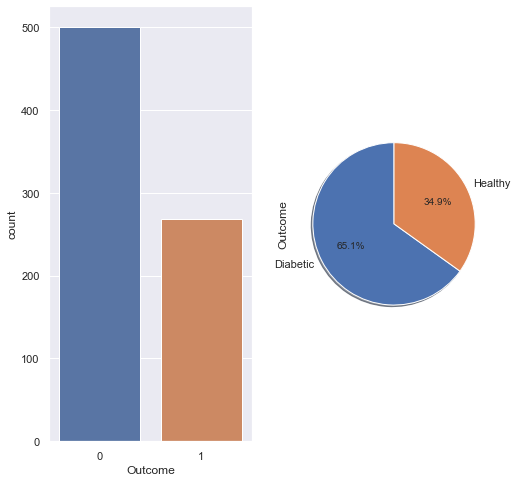

In [16]:
# countplot----Plot the statistic of diabetic and non-diabetic (OUTCOME)

fig1, ax1 = plt.subplots(1, 2, figsize=(8,8))

sns.countplot(diabetes['Outcome'], ax = ax1[0])

labels = 'Diabetic', 'Healthy'

diabetes.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

The first plot shows the count values of the outcome and second pieplot shows that 65.1% people are diabetic and 34.9% people are Healthy

# Plots to analyze the Dataset

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

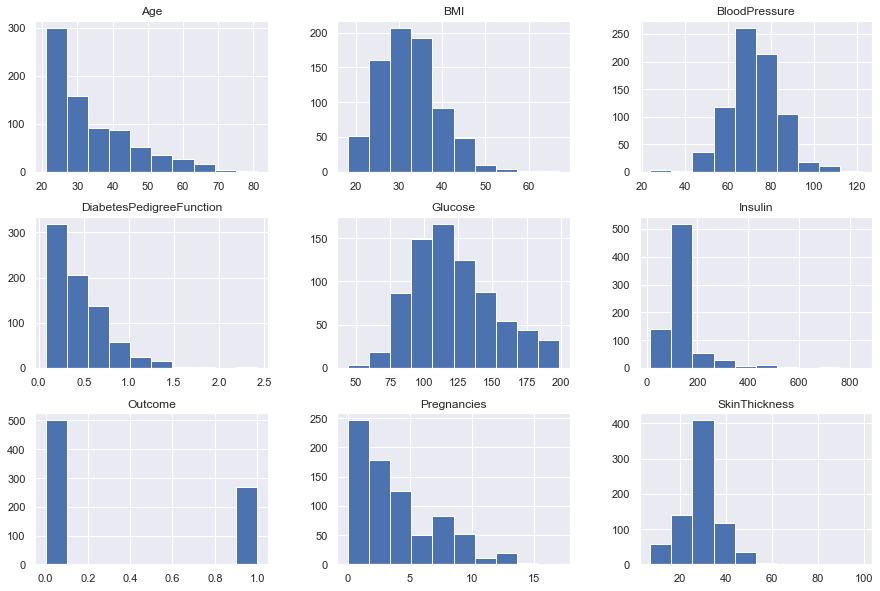

In [17]:
# Histogram 

diabetes.hist(figsize=(15,10))

<AxesSubplot:xlabel='Age'>

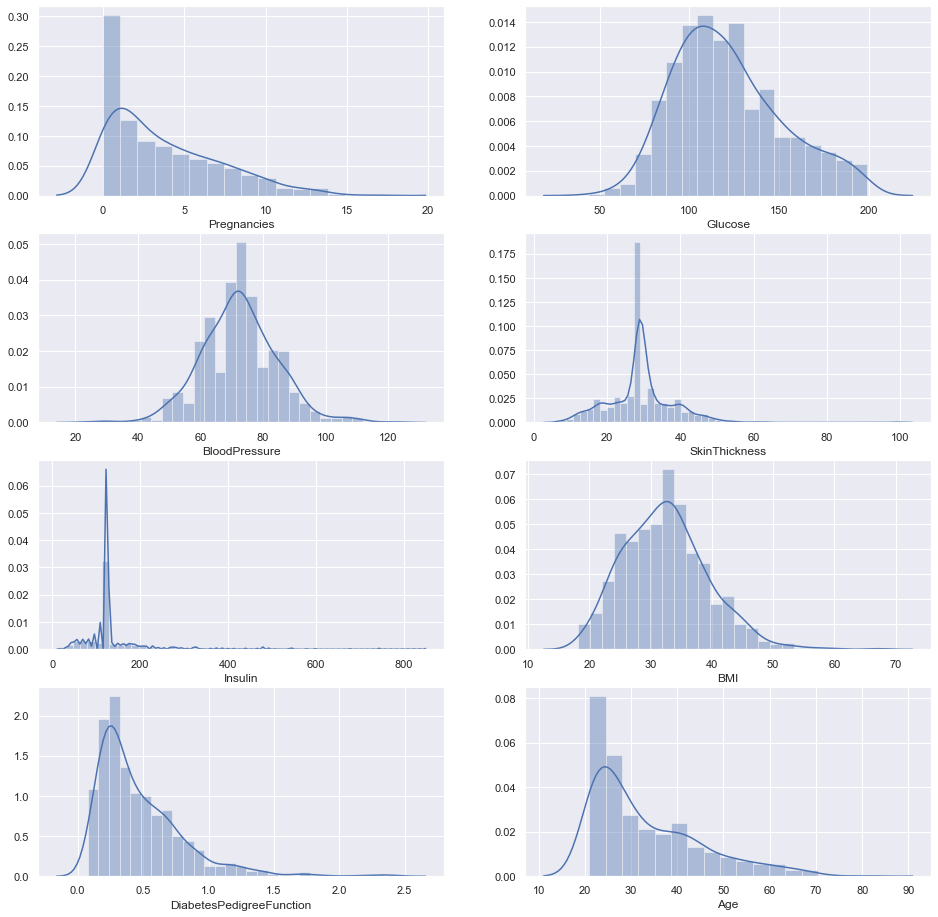

In [18]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize = (16, 16))
sns.distplot(diabetes['Pregnancies'], ax = ax2[0][0])
sns.distplot(diabetes['Glucose'], ax = ax2[0][1])
sns.distplot(diabetes['BloodPressure'], ax = ax2[1][0])
sns.distplot(diabetes['SkinThickness'], ax = ax2[1][1])
sns.distplot(diabetes['Insulin'], ax = ax2[2][0])
sns.distplot(diabetes['BMI'], ax = ax2[2][1])
sns.distplot(diabetes['DiabetesPedigreeFunction'], ax = ax2[3][0])
sns.distplot(diabetes['Age'], ax = ax2[3][1])

The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

Outliers

## VISUALIZING OUTLIERS

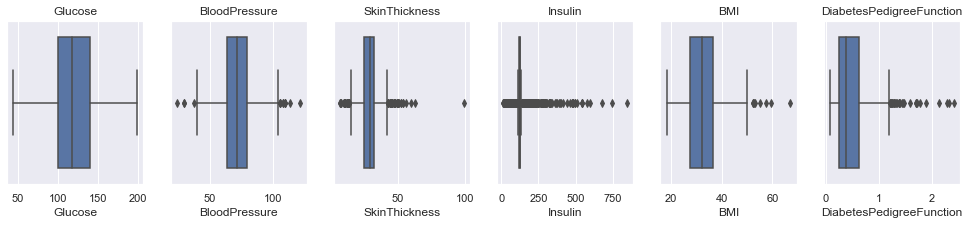

In [19]:
# boxplot

fig = plt.figure(figsize=(20,3))
for i in np.arange(1,7):
    data3 = plt.subplot(1,7,i, title=diabetes.columns[i])
    sns.boxplot(diabetes[diabetes.columns[i]])

We have replaced the '0' value to median of the parameters. The plot shows outliers present in the dataset.

BloodPressure,SkinThickness,Insulin,BMI have outliers.It is clearly visible in the boxplots.

## Pairplot, Heatmap, and Correlation matrix

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


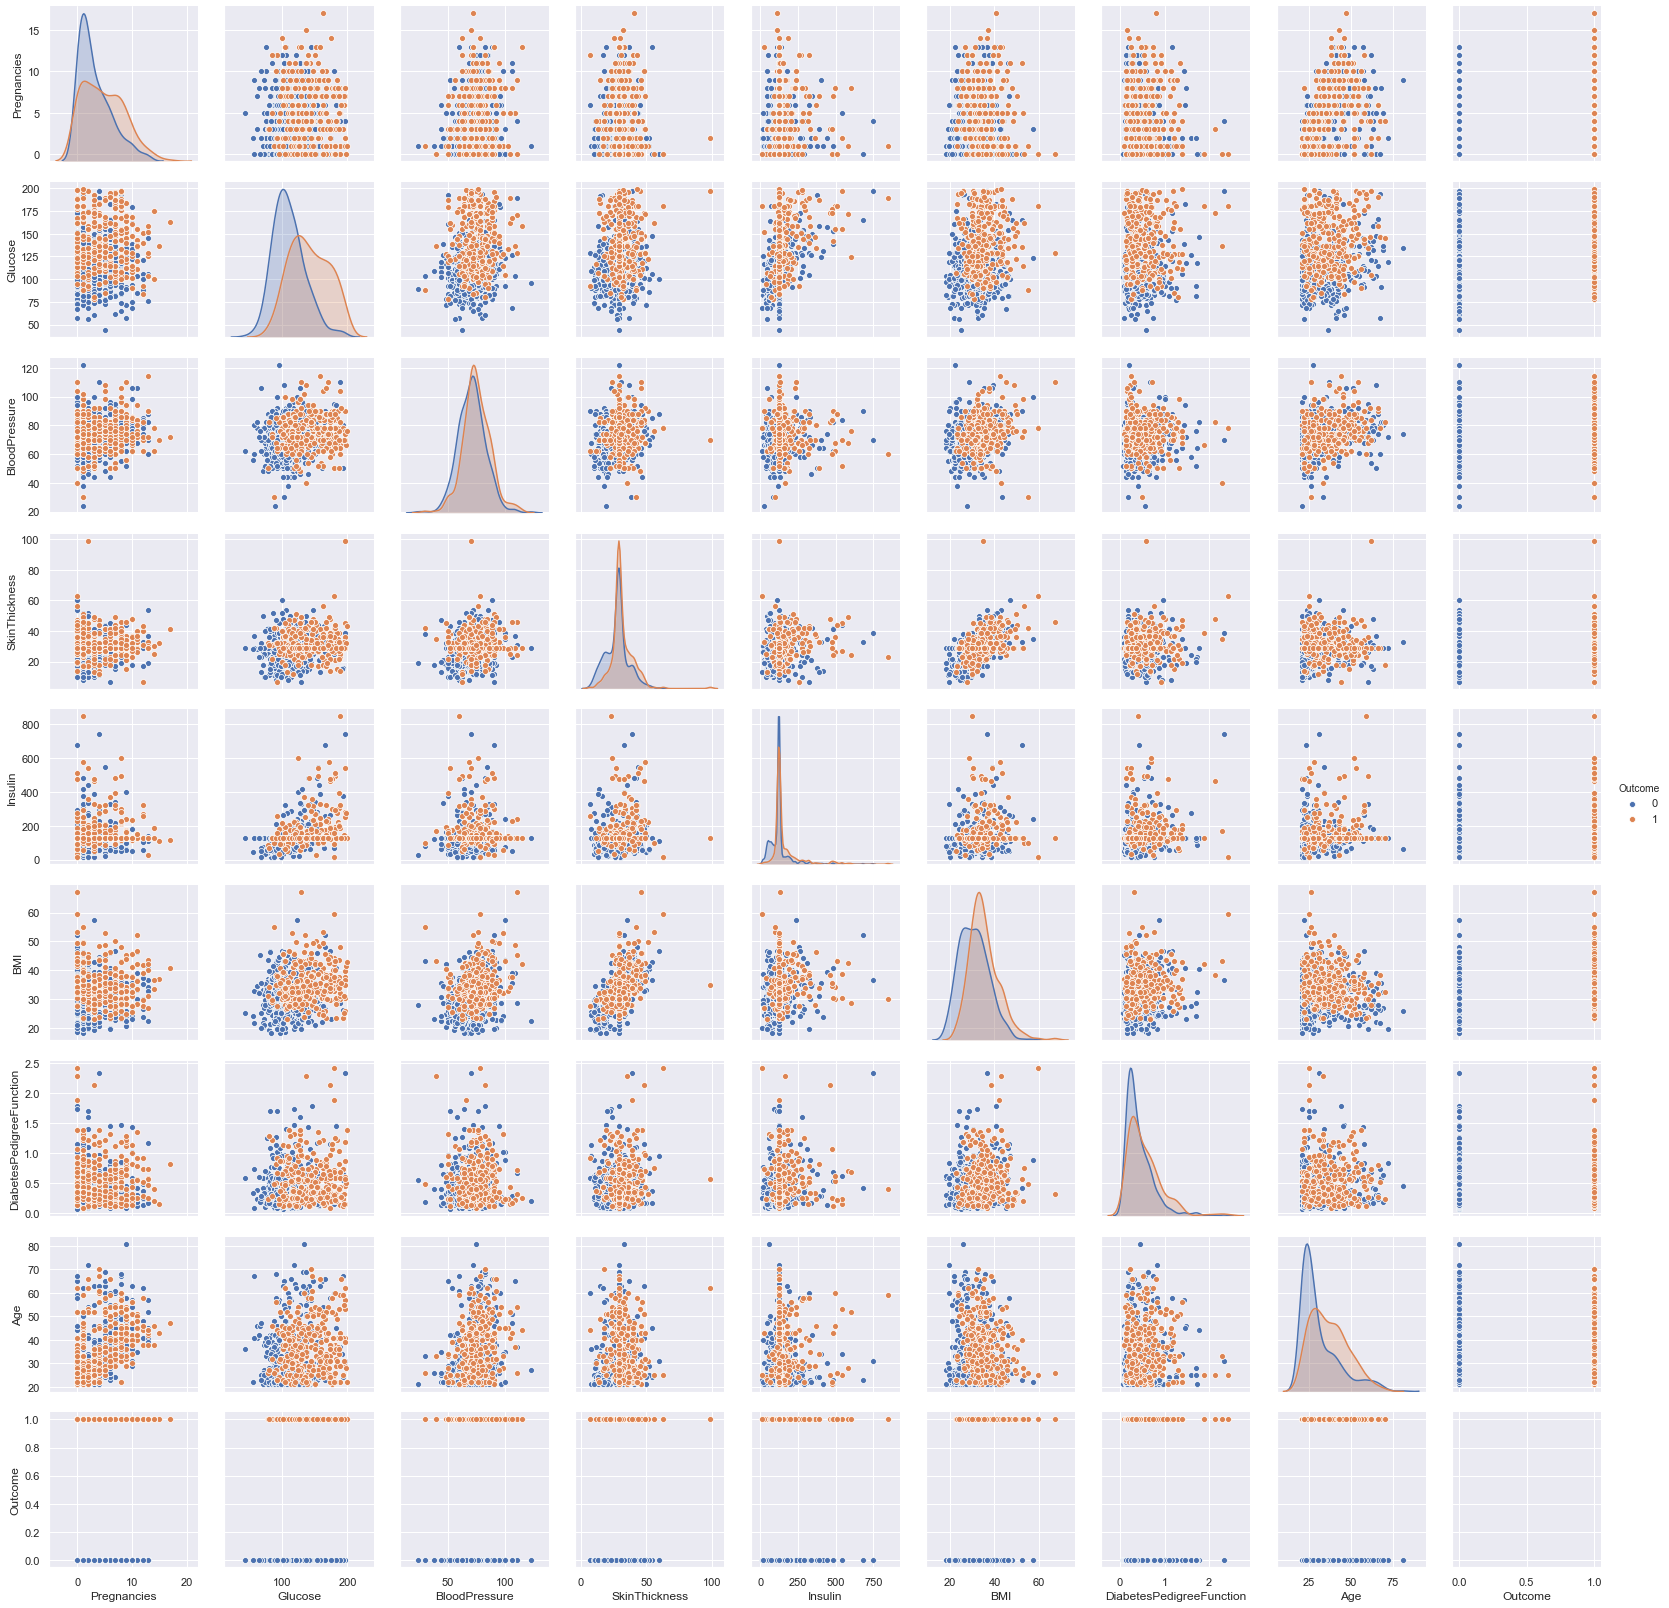

In [20]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(diabetes, hue = 'Outcome' )

# The plot shows that there is some relationship between parameters. Outcome is added as hue. We see that blue and orange dots are overlap. Also,

1. Pregnancies and age have some kind of a linear line.
2. BloodPressure and age have little relation. Most of the aged people have BloodPressure.
3. Insulin and Glucose have some relation.

In [21]:
# corrlation matrix 

corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

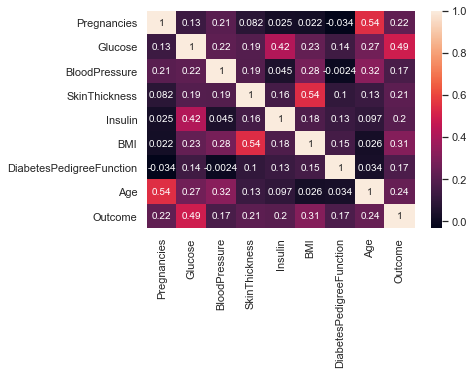

In [22]:
# correlation plot---heatmap

sns.heatmap(corr,annot=True)

The correlation plot shows the relation between the parameters.

1. Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.

2. Insulin and DiabetesPedigreeFunction have little correlation with the outcome.

3. BloodPressure and SkinThickness have tiny correlation with the outcome

4. There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

# Bivariate Analysis Against the Outcome

Analysis of 'Age' parameter

In [23]:
a = pd.Series([])

for i in diabetes.index:
    if(diabetes.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(diabetes.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(diabetes.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(diabetes.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
diabetes['Age']=a
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,41-55,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31-40,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,31-40,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21-24,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,31-40,1


In [24]:
#Find the number of diabetic person in each age group

data1 = diabetes[diabetes['Outcome']==1].groupby('Age')[['Outcome']].count()
data1

data1.head()

,Outcome
Age,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [25]:
# Percentage of diabetic Person in each age group

data2 = diabetes.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1.head()

,Outcome,Diabetic %
Age,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


It shows that 48% people are Diabetic in the age group of 31-40 
and 59% people diabetic in the age group of 41-55.
It depicts that the percentage of diabetic people in these age group is higher than the other age group.

<AxesSubplot:xlabel='Age', ylabel='Diabetic %'>

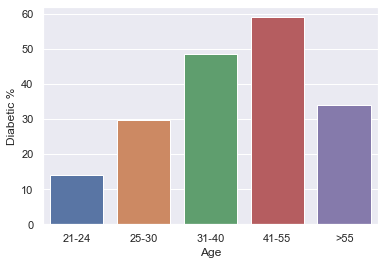

In [26]:
#4.1 barplot

sns.barplot(data1.index,data1['Diabetic %'])

It is evident from the barplot that percentage of women diagnosed with diabetic are in the age group between '31-55'. It means that the middle aged women are most likely to be diabetic than young or old women.

# Analysis of 'Pregnancies' parameter

In [27]:
#6.Crosstab gives the fregency table information ----Pregnancies

pd.crosstab(diabetes['Pregnancies'],diabetes['Outcome']).head()

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

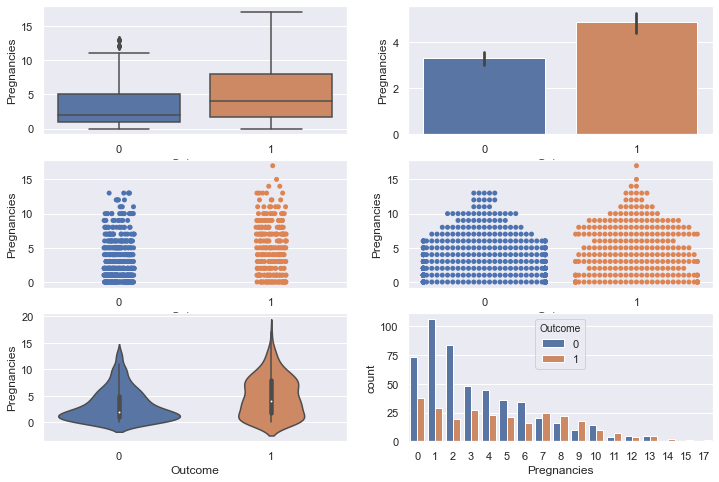

In [28]:
# Categorical vs Continuous ----Outcome vs Pregnancies

fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=diabetes,ax=ax2[0][0])
sns.barplot(diabetes['Outcome'], diabetes['Pregnancies'],ax=ax2[0][1])
sns.stripplot(diabetes['Outcome'], diabetes['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes['Outcome'], diabetes['Pregnancies'], ax=ax2[1][1])
sns.violinplot(diabetes['Outcome'], diabetes['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=diabetes,ax=ax2[2][1])

The plots shows that pregnant people have higher chances of diabetes.


# Analysis of 'Glucose' parameter

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

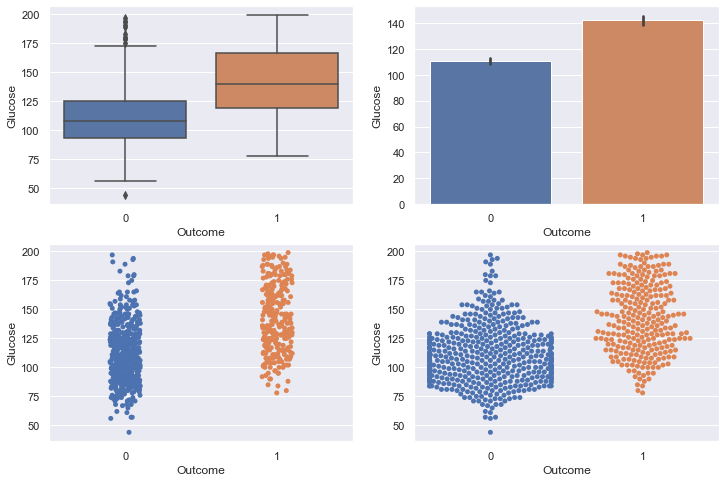

In [29]:
# Categorical vs Continuous ---- Outcome vs Glucose 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes,ax=ax2[0][0])
sns.barplot(diabetes['Outcome'], diabetes['Glucose'],ax=ax2[0][1])
sns.stripplot(diabetes['Outcome'], diabetes['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes['Outcome'], diabetes['Glucose'], ax=ax2[1][1])

# Analysis of 'BloodPressure' parameter

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

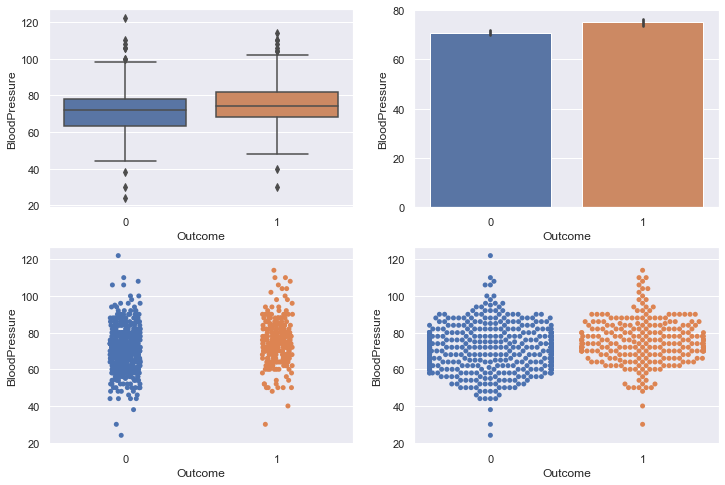

In [30]:
# Categorical vs Continuous ---- Outcome vs BloodPressure

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=diabetes,ax=ax2[0][0])
sns.barplot(diabetes['Outcome'], diabetes['BloodPressure'],ax=ax2[0][1])
sns.stripplot(diabetes['Outcome'], diabetes['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes['Outcome'], diabetes['BloodPressure'], ax=ax2[1][1])

# Analysis of 'SkinThickness' parameter

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

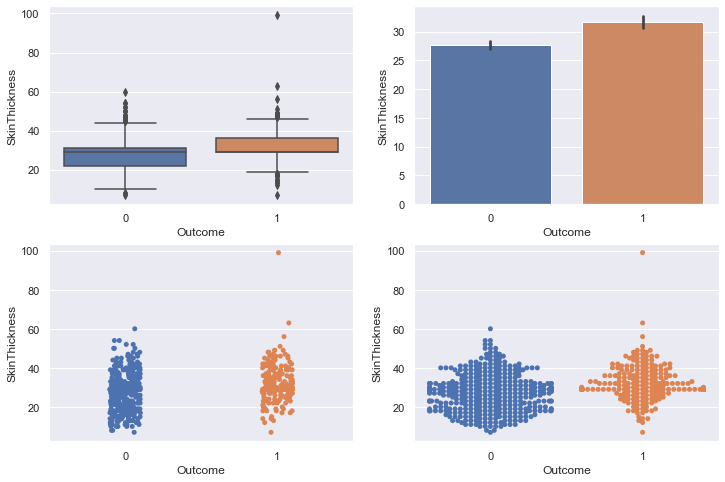

In [31]:
# Categorical vs Continuous ----Outcome vs SkinThickness  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=diabetes,ax=ax2[0][0])
sns.barplot(diabetes['Outcome'], diabetes['SkinThickness'],ax=ax2[0][1])
sns.stripplot(diabetes['Outcome'], diabetes['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes['Outcome'], diabetes['SkinThickness'], ax=ax2[1][1])

# Analysis of 'BMI' parameter

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

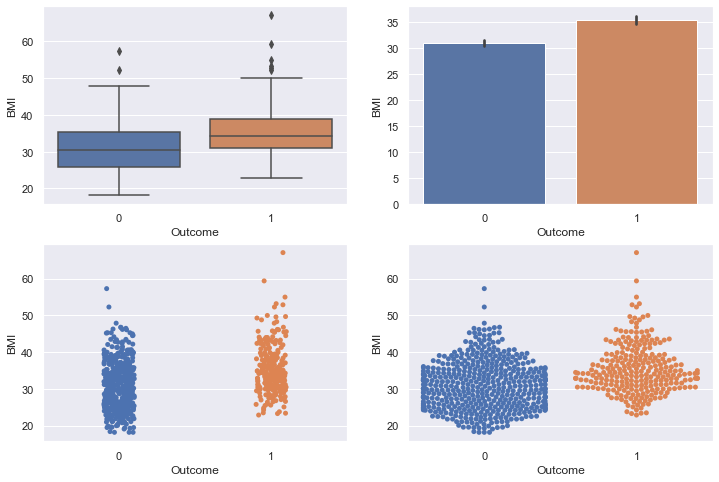

In [32]:
# Categorical vs Continuous ----Outcome vs BMI

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=diabetes,ax=ax2[0][0])
sns.barplot(diabetes['Outcome'], diabetes['BMI'],ax=ax2[0][1])
sns.stripplot(diabetes['Outcome'], diabetes['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes['Outcome'], diabetes['BMI'], ax=ax2[1][1])

# Analysis of 'DiabetesPedigreeFunction' parameter

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

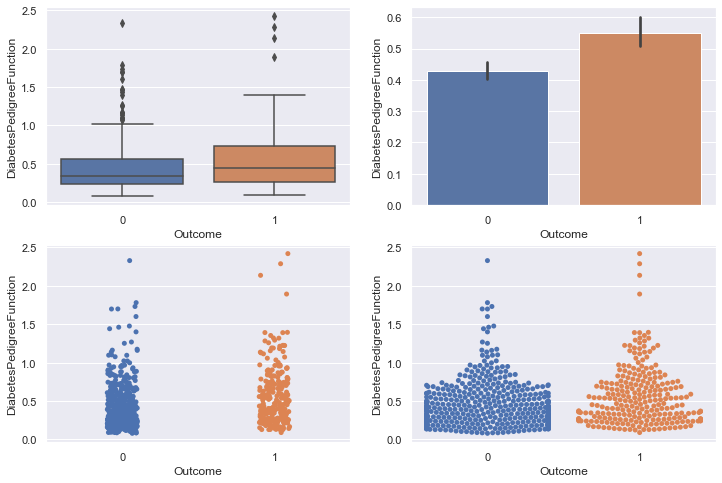

In [34]:
# Categorical vs Continuous ----Outcome vs DiabetesPedigreeFunction

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=diabetes,ax=ax2[0][0])
sns.barplot(diabetes['Outcome'], diabetes['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(diabetes['Outcome'], diabetes['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(diabetes['Outcome'], diabetes['DiabetesPedigreeFunction'], ax=ax2[1][1])

# Analysis of Age and Pregnancy

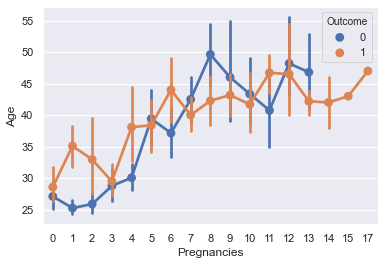

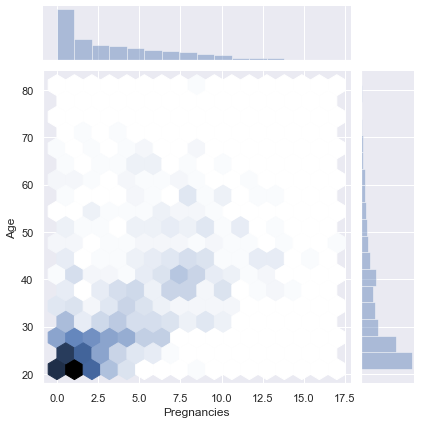

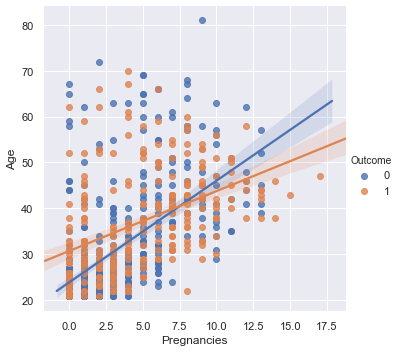

In [38]:
# lmplot---linear Regression plots
diabetes=pd.read_csv('dia.csv')

sns.pointplot(diabetes['Pregnancies'], diabetes['Age'], hue=diabetes['Outcome'])
sns.jointplot(diabetes['Pregnancies'], diabetes['Age'], kind='hex')
sns.lmplot(x='Pregnancies',y='Age',data=diabetes,hue='Outcome')

# Analysis of Insulin and skin thickness

In [ ]:
sns.pointplot(diabetes['Insulin'], diabetes['SkinThickness'], hue=diabetes['Outcome'])
sns.jointplot(diabetes['Insulin'], diabetes['SkinThickness'], kind='hex')
sns.lmplot(x='Insulin',y='SkinThickness',data=diabetes,hue='Outcome')